In [52]:
# Classifying movie reviews: a binary classification example 
from keras.datasets import imdb

# Load dataset
# num_words means that we'll keep the top 10,000 most frequently occuring words in training data
# train_data and test_data are lists of reviews: each review is a list of word indices
# test_data and test_test_labels are a list of 0s and 1s: 0 is negative and 1 is positive
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [53]:
# Turn lists in tensors to feed into neural network
import numpy as np

# Turn given sequence into a 10,000 dimensional vector
def vectorize_sequence(sequences, dimension=10000):
    # Create all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    # Set specific indices to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

# Vectorized training data
x_train = vectorize_sequence(train_data)

# Vectorized test data
x_test = vectorize_sequence(test_data)

# Vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [54]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()

# Two intermediate layers with 16 hidden units each
# relu activation function that zero out negative values
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))

# Third layer to output scalar prediction regarding sentiment of current review
# sigmoid activation function to output probability of how 
# likely sample is positive or negative review
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [55]:
# Create validation set to monitor training the accuracy of the model on data it has never seen

# Set apart 10,000 samples from original training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train model for 20 epochs (20 iterations over all samples in x_train and y_train tensors) in batches of 512 samples
# Monitors loss and activity on 10k samples with "validation_data" parameter
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5359 - acc: 0.7809 - val_loss: 0.4188 - val_acc: 0.8508
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3363 - acc: 0.8897 - val_loss: 0.3273 - val_acc: 0.8751
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2491 - acc: 0.9152 - val_loss: 0.2911 - val_acc: 0.8839
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2011 - acc: 0.9311 - val_loss: 0.2756 - val_acc: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1677 - acc: 0.9446 - val_loss: 0.2756 - val_acc: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1435 - acc: 0.9543 - val_loss: 0.2856 - val_acc: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1254 - acc: 0.9605 - val_loss: 0.3026 - val_acc: 0.8791
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1048 - a

In [56]:
# Convert to dictionary
# Each key is a metric that was monitored during training and during validation
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

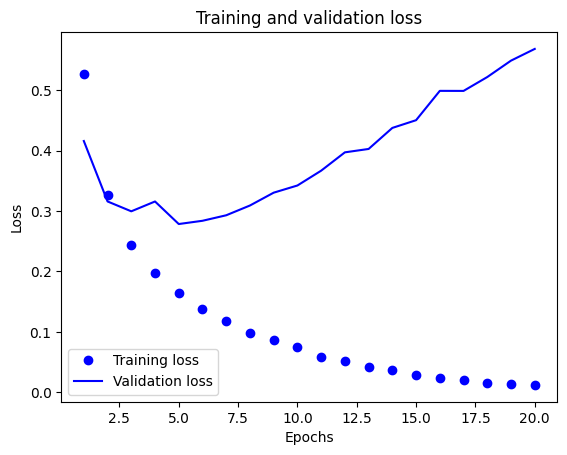

In [51]:
# Plotting training and validation loss

import matplotlib.pyplot as plt

# Assign training loss
loss_values = history_dict["loss"]

# Assign validation loss
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

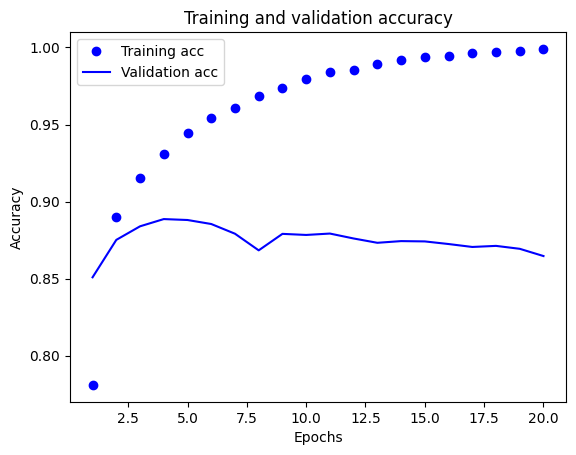

In [57]:
# Plotting training and validation accuracy

# Clears the figure
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [58]:
# Train new network for four epochs and evaluate on test data

# Retraining a model from scratch
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4801 - accuracy: 0.8136
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2885 - accuracy: 0.9016
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2261 - accuracy: 0.9183
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2838 - accuracy: 0.8856


[0.2837744355201721, 0.885640025138855]